In [84]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import shapely.geometry

In [147]:
emission = gpd.read_file("data/EDF-methaneLeakMap-completeDataSet/Chicago/Chicago.shp")
schools = gpd.read_file("data/geo_json/School_District_Boundaries_-_Current.geojson")
powerplants = gpd.read_file("data/geo_json/Power_Plants.geojson")
pipelines = gpd.read_file("data/geo_json/NaturalGas_InterIntrastate_Pipelines_US_EIA_-6673208179901703463.geojson")
oil_gas = gpd.read_file("data/IL_Oil_Gas_GasStor_Fields_Buffer_2024_Py/IL_Oil_Gas_GasStor_Fields_Buffer_2024_Py.shp")

/var/folders/6b/cxkqzvv944q2jln0sh3vjcc00000gn/T/ipykernel_6288/3958368440.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  schools_il['lon'] = schools_il.geometry.centroid.x
/opt/homebrew/anaconda3/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/6b/cxkqzvv944q2jln0sh3vjcc00000gn/T/ipykernel_6288/3958368440.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  school

<Axes: >

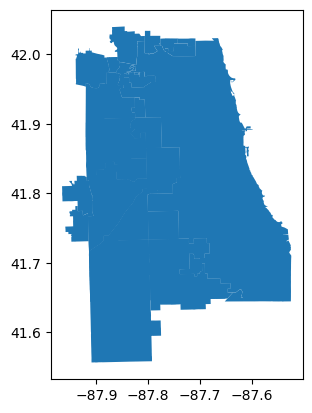

In [135]:
# Get only Schools from Illinois
schools_il = schools[schools['STATEFP'] == '17']    # 17 = Illinois

# Extract latitude and longitude
schools_il['lon'] = schools_il.geometry.centroid.x
schools_il['lat'] = schools_il.geometry.centroid.y

# Filter only points inside Chicago bounding box
schools_chicago = schools_il[
    (schools_il['lat'] >= 41.64) & (schools_il['lat'] <= 42.02) &
    (schools_il['lon'] >= -87.94) & (schools_il['lon'] <= -87.52)
]

# Plot
schools_chicago.plot()


/var/folders/6b/cxkqzvv944q2jln0sh3vjcc00000gn/T/ipykernel_6288/1942256547.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pipelines['lat'] = pipelines.geometry.centroid.y
/var/folders/6b/cxkqzvv944q2jln0sh3vjcc00000gn/T/ipykernel_6288/1942256547.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pipelines['lon'] = pipelines.geometry.centroid.x


<Axes: >

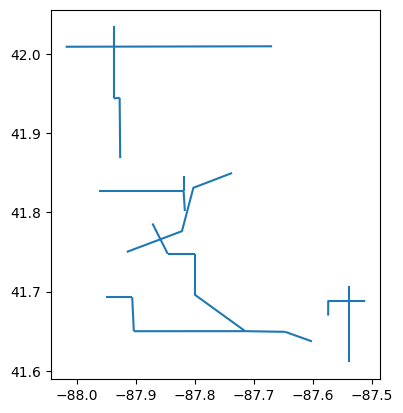

In [136]:
# For Pipelines
pipelines['lat'] = pipelines.geometry.centroid.y
pipelines['lon'] = pipelines.geometry.centroid.x

pipelines_chicago = pipelines[
    (pipelines['lat'] >= 41.64) & (pipelines['lat'] <= 42.02) &
    (pipelines['lon'] >= -87.94) & (pipelines['lon'] <= -87.52)
]

pipelines_chicago.plot()


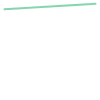

In [192]:
pipelines.geometry.values[1]

/var/folders/6b/cxkqzvv944q2jln0sh3vjcc00000gn/T/ipykernel_6288/691142277.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  powerplants['lat'] = powerplants.geometry.centroid.y
/var/folders/6b/cxkqzvv944q2jln0sh3vjcc00000gn/T/ipykernel_6288/691142277.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  powerplants['lon'] = powerplants.geometry.centroid.x


<Axes: >

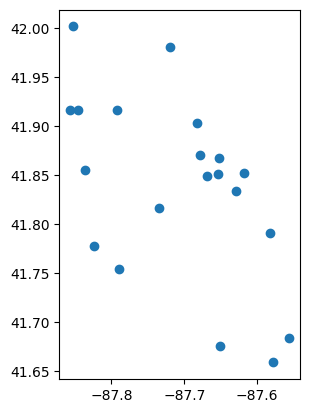

In [137]:
# For Powerplants
powerplants['lat'] = powerplants.geometry.centroid.y
powerplants['lon'] = powerplants.geometry.centroid.x

powerplants_chicago = powerplants[
    (powerplants['lat'] >= 41.64) & (powerplants['lat'] <= 42.02) &
    (powerplants['lon'] >= -87.94) & (powerplants['lon'] <= -87.52)
]

powerplants_chicago.plot()


In [138]:
emission_chicago = emission[
    (emission.geometry.x >= -87.94) & (emission.geometry.x <= -87.52) &
    (emission.geometry.y >= 41.64) & (emission.geometry.y <= 42.02)
]

In [142]:
# 1. Reproject everything to EPSG:3395 (meters)
schools_chicago = schools_chicago.to_crs(epsg=3395)
pipelines_chicago = pipelines_chicago.to_crs(epsg=3395)
powerplants_chicago = powerplants_chicago.to_crs(epsg=3395)
emission_chicago = emission_chicago.to_crs(epsg=3395)
oil_gas = oil_gas.to_crs(epsg=3395)

# 2. Create 2km buffer around emission points
emission_chicago['buffer_5km'] = emission_chicago.geometry.buffer(5000)

<Axes: >

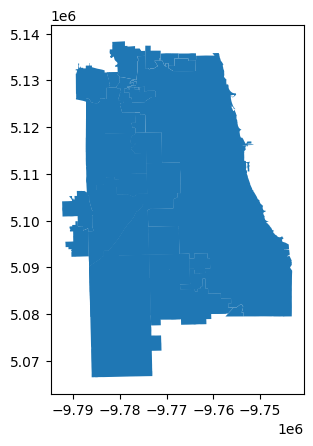

In [140]:
schools_chicago.plot()

In [164]:
facility = pd.read_csv("data/2023_il.csv")

In [173]:
facility_chicago = facility[facility['6. CITY'] == 'CHICAGO'][['4. FACILITY NAME', '12. LATITUDE', '13. LONGITUDE']]

<Axes: >

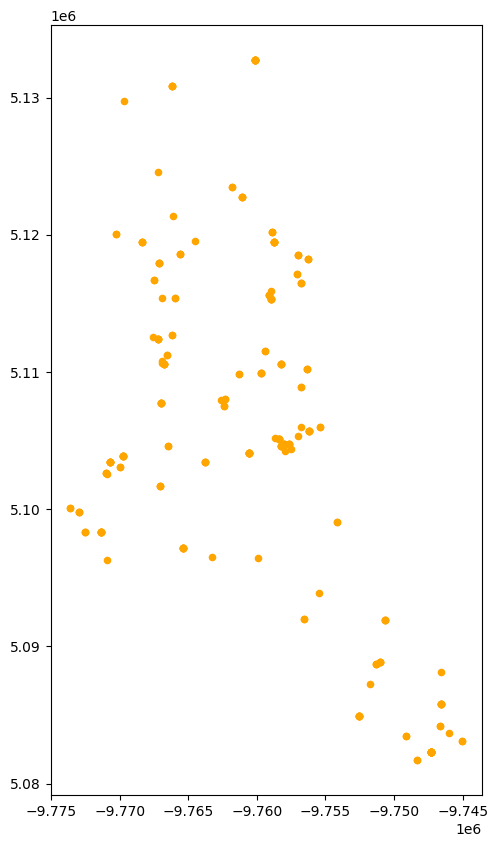

In [177]:
# 1. Create geometry from lat/lon
facility_chicago['geometry'] = facility_chicago.apply(lambda row: Point(row['13. LONGITUDE'], row['12. LATITUDE']), axis=1)

# 2. Convert to GeoDataFrame
facility_chicago_gdf = gpd.GeoDataFrame(facility_chicago, geometry='geometry', crs="EPSG:4326")

# 3. Reproject to meters
facility_chicago_gdf = facility_chicago_gdf.to_crs(epsg=3395)

# 4. Plot to verify
facility_chicago_gdf.plot(figsize=(10, 10), color='orange', markersize=20)

/var/folders/6b/cxkqzvv944q2jln0sh3vjcc00000gn/T/ipykernel_6288/2724748105.py:23: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


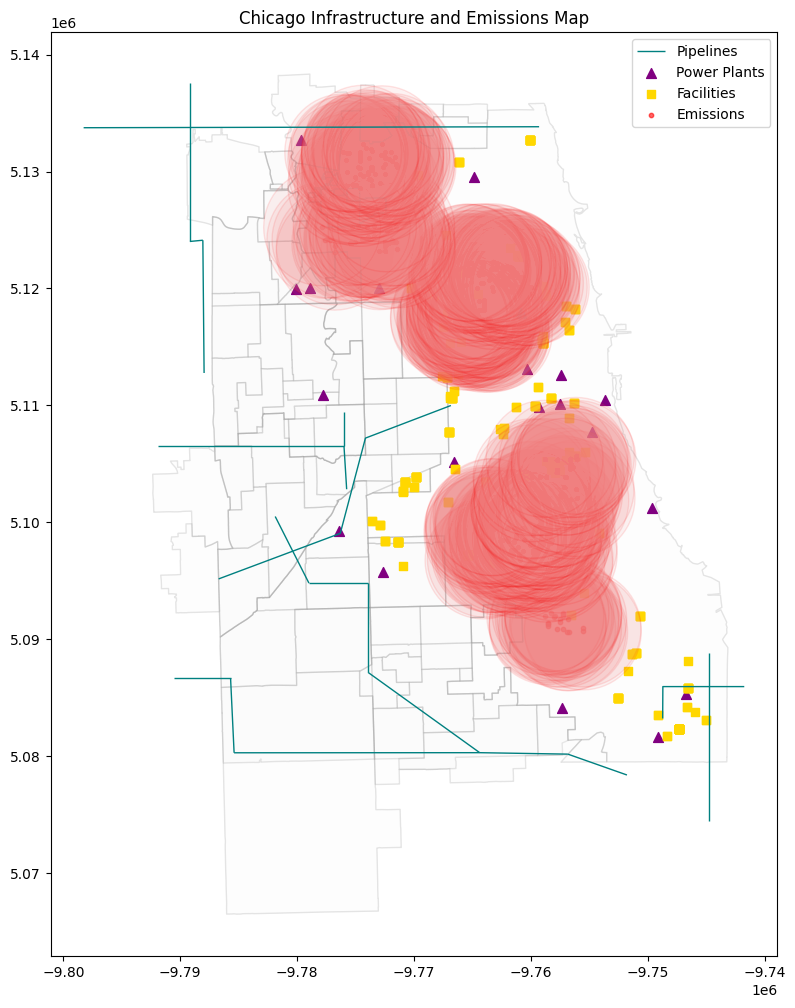

In [180]:
# Setup figure
fig, ax = plt.subplots(figsize=(12, 12))

# Plot School Areas (polygons)
schools_chicago.plot(ax=ax, color='whitesmoke', alpha=0.2, edgecolor='gray', label='School Areas')

# Plot Pipelines (lines)
pipelines_chicago.plot(ax=ax, color='teal', linewidth=1, label='Pipelines')

# Plot Power Plants (points with 'P' marker)
powerplants_chicago.plot(ax=ax, color='purple', markersize=50, marker='^', label='Power Plants')  # triangle shape

# Plot Facilities (points with 's' marker)
facility_chicago_gdf.plot(ax=ax, color='gold', markersize=30, marker='s', label='Facilities')  # square shape

# Plot Emission Points (with 'o' marker)
emission_chicago.plot(ax=ax, color='red', markersize=10, marker='o', alpha=0.6, label='Emissions')  # circle shape

# Plot Emission Buffers (polygons)
emission_chicago.set_geometry('buffer_5km').plot(ax=ax, color='lightcoral', alpha=0.1, edgecolor='red', label='Emission 5km Buffer')

# Legend and title
plt.legend()
plt.title('Chicago Infrastructure and Emissions Map')
plt.show()


In [189]:
import folium
from folium import plugins

# 1. Reproject everything to EPSG:4326 (lat/lon) for Folium
emission_chicago_wgs = emission_chicago.to_crs(epsg=4326)
facility_chicago_wgs = facility_chicago_gdf.to_crs(epsg=4326)
powerplants_chicago_wgs = powerplants_chicago.to_crs(epsg=4326)
pipelines_chicago_wgs = pipelines_chicago.to_crs(epsg=4326)
schools_chicago_wgs = schools_chicago.to_crs(epsg=4326)

# 2. Create Folium base map centered on Chicago
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11, tiles='cartodb positron')

# 3. Add emissions as red circle markers
emission_layer = folium.FeatureGroup(name='Emissions')
for idx, row in emission_chicago_wgs.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=3,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup=f"Emission {idx}"
    ).add_to(emission_layer)

# 4. Add emission 5km buffer zones
buffer_layer = folium.FeatureGroup(name='Emission 5km Buffers')

for idx, row in emission_chicago_wgs.iterrows():
    # Approximate 5km = 0.045 degrees (roughly, works for small zones)
    folium.Circle(
        location=[row.geometry.y, row.geometry.x],
        radius=5000,   # in meters
        color='red',
        fill=True,
        fill_opacity=0.1,
        popup=f"5km Buffer for Emission {idx}"
    ).add_to(buffer_layer)

# 5. Add TRI facilities (factories) as gold markers
facility_layer = folium.FeatureGroup(name='Facilities')
for idx, row in facility_chicago_wgs.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        icon=folium.Icon(color='orange', icon='industry', prefix='fa'),
        popup=row['4. FACILITY NAME']
    ).add_to(facility_layer)

# 6. Add powerplants as purple markers
powerplant_layer = folium.FeatureGroup(name='Power Plants')
for idx, row in powerplants_chicago_wgs.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        icon=folium.Icon(color='purple', icon='bolt', prefix='fa'),
        popup="Power Plant"
    ).add_to(powerplant_layer)

# 7. Add pipelines as polyline
pipeline_layer = folium.FeatureGroup(name='Pipelines')
for idx, row in pipelines_chicago_wgs.iterrows():
    folium.PolyLine(
        locations=[(coord[1], coord[0]) for coord in row.geometry.coords],
        color='teal',
        weight=2,
    ).add_to(pipeline_layer)

# 8. Add school areas (optional, faint polygons)
school_layer = folium.FeatureGroup(name='School Areas')
for idx, row in schools_chicago_wgs.iterrows():
    folium.GeoJson(
        data=row.geometry.__geo_interface__,
        style_function=lambda x: {'fillColor': 'whitesmoke', 'color': 'gray', 'weight': 0.5, 'fillOpacity': 0.2},
        tooltip=row.get('NAME', 'School District')
    ).add_to(school_layer)

# 9. Add all layers to map
emission_layer.add_to(m)
buffer_layer.add_to(m)
facility_layer.add_to(m)
powerplant_layer.add_to(m)
pipeline_layer.add_to(m)
school_layer.add_to(m)

# 10. Add layer control
folium.LayerControl(collapsed=False).add_to(m)

# 11. Show map
m



In [188]:
m.save('chicago_emissions_map.html')